<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016330)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2022/2023 <br>
Assistent: Srdan Lazendic
</div>

# Lab assignment 5: CNNs and Autoencoders

In this assignment we will first train a CNN for the classification problem and then an autoencoderencoder that learns representations of images of the `fashion_mnist` dataset. Finally, you will create a simple image retrieval system by using the trained autoencoder and the nearest-neighbors algorithm.

### Dataset `Fashion MNIST`

This examples uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images split into 10 categories. Each image contains one peace of clothing or footwear. 
Resolution of each image is $28 \times 28$ pixels.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Image 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST examples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a replacement for the traditional [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that was previously often used as the first illustrative data set for classification (with images). `MNIST` contains images of handwritten numbers in a very similar format as previously described for `Fashion MNIST`.

Fashion `MNIST` is a somewhat heavier set of data compared to `MNIST`, but both sets are extremely clean (no noise, deviations in the corners of the photo, relatively similar lighting), and solving the classification problem on them is not difficult.

In this example, we will use $40000$ images to train the network, $20000$ images for the validation and the other $10000$ images to evaluate how accurately our network has classified the images.

Since `Fashion MNIST` is a relatively well-known set that is often used, it is not uncommon for libraries to provide auxiliary functions for its download and use.

In [67]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, UpSampling2D, Conv2DTranspose, Reshape,UpSampling3D,ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

**Question 1:** Using the `load_data` function from the `fashion_mnist` package, load images for the training set and the test set.

In [68]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [69]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**Question 2:** Select the first $40000$ images from the loaded set for training, and then the next $20000$ for validation.

In [70]:
x_train_2 = x_train[:40000]
y_train_2= y_train[:40000]
x_val = x_train[40000:60000]
y_val = y_train[40000:60000]

**Question 3:** Transform the loaded images into the `float32` type, and then normalize them.

In [71]:
#transform images into float32
x_train_2 = x_train_2.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')


In [72]:
#normalization of the images
x_train_2, x_val, x_test = x_train_2 / 255.0, x_val / 255.0, x_test / 255.0

## Part 1: CNN

**Question 4:** Create a convolutional neural network with the following properties:

- Sequential model consisting of convolutional and max pooling layers used alternately.
- Three convolutional layers consist of  $32$, $64$ and $128$  kernels, respectively and they are all of size $3\times 3$, with the  $\mathrm{ReLU}$  activation function.
- Each of the two max pooling layers is with the pool size  $2\times 2$.
- After the third convolutional layer use the `Flatten` layer.
- Finally, add on top two fully connected layers with $128$ and $10$  neurons, with $\mathrm{ReLU}$ and *softmax* activation functions, respectively.

In [73]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


**Question 5:** Train the previously defined network in $10$ epochs with the batch size equal to $32$. For the error, use `categorical cross entropy`, other parameters you may choose arbitrarily. Create a textual summary of your model.

In [74]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [75]:
epochs = 10
batch_size = 32
num_classes = 10

train_labels_cat = tf.keras.utils.to_categorical(y_train_2, num_classes)
val_labels_cat = tf.keras.utils.to_categorical(y_val, num_classes)
test_labels_cat = tf.keras.utils.to_categorical(y_test, num_classes)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train_2, train_labels_cat, epochs=epochs,
                    batch_size=batch_size,  validation_data=(x_val, val_labels_cat))

model.summary()

Epoch 1/10
1250/1250 [==============================] - 21s 16ms/step - loss: 0.5173 - accuracy: 0.8092 - val_loss: 0.3822 - val_accuracy: 0.8622
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.3327 - accuracy: 0.8776 - val_loss: 0.3110 - val_accuracy: 0.8859
Epoch 3/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.2829 - accuracy: 0.8961 - val_loss: 0.2890 - val_accuracy: 0.8938
Epoch 4/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2490 - accuracy: 0.9065 - val_loss: 0.2902 - val_accuracy: 0.8939
Epoch 5/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2241 - accuracy: 0.9160 - val_loss: 0.2748 - val_accuracy: 0.9002
Epoch 6/10
1250/1250 [==============================] - 19s 16ms/step - loss: 0.1983 - accuracy: 0.9255 - val_loss: 0.2677 - val_accuracy: 0.9050
Epoch 7/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1784 - accuracy: 0.9331 - val_loss: 0.2711 -

**Question 6:** 
- Plot the accuracy on the training and validation datasets over training epochs. Add a legend.
- What do you observe from the obtained plot?
- How could you improve the previous model? Explain shortly!

Text(0.5, 1.0, 'Training and Validation Accuracy')

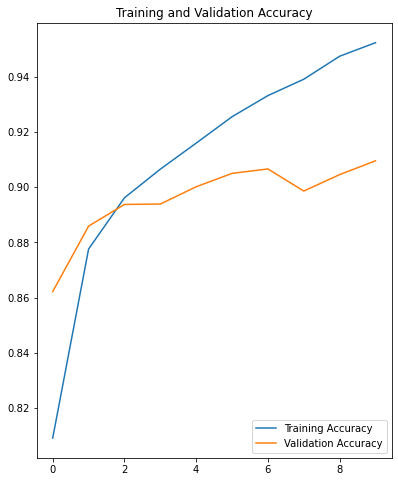

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#From the plot we can observe a very good performance on the training set and a
#bad performance on the validation set, this is due because of overfitting, a situation in which the 
#model does not generalize the data and is very complex.
#To improve the previous model we can use data augmentation, increase the number of epochs or use regularization techniques.

## Part 2: Autoencoder

**Question 7:** Create an autoencoder network with the following properties:
- the `encoder` consists of $3$ convolutional and $3$ max pooling layers used alternately
    - convolutional layers consist of $64$, $32$ and $16$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function 
    - each max pooling layer is with the pool size $2\times 2$
- the `decoder` consists of $3$ convolutional and $3$ up sampling layers used alternately
    - convolutional layers consist of $16$, $32$ and $64$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function at each layer, except at the last (output) layer where the *sigmoid* activation function is used
    - each up sampling layer is with the usampling factors of size $2\times 2$.

Use the `Adam` optimizer and `MSE` error as a loss function. 

**Note:** Name the output of the final max pooling layer, i.e., the model that produces the latent representation, `encoder` (this will be useful for the second part of the assignment).

In [90]:
# Encoder
inputs = Input(shape=(28, 28, 1), name='encoder_input')
x = inputs

# Convolutional and max pooling layers
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2),padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = MaxPool2D((2, 2),padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = MaxPool2D((2, 2),padding='same')(x)

# Define the encoder model
encoder = Model(inputs=inputs, outputs=x, name='encoder')
encoder.summary()




kernel_size = (3, 3)

pool_size = (2, 2)


# Decoder

latent_inputs = Input(shape=(4,4,16), name='decoder_input')

x = Conv2D(filters=16, kernel_size=kernel_size,
           activation='relu',padding='same')(latent_inputs)

x = UpSampling2D(size=up_sampling_factors)(x)

x = Conv2D(filters=32,
           kernel_size=kernel_size,
           activation='relu',padding='same')(x)

x = UpSampling2D(size=up_sampling_factors)(x)

x = Conv2D(filters=64,
           kernel_size=kernel_size,
           activation='relu')(x)

x = UpSampling2D(size=up_sampling_factors)(x)

 
# then we add one more convolutional layer to control the channel dimension   
x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)

# and one activation later with the sigmoid activation function
outputs = Activation('sigmoid', name='decoder_output')(x)

# Define the decoder model
decoder = Model(inputs=latent_inputs, outputs=outputs, name='decoder')
decoder.summary(line_length=110)

autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_217 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_218 (Conv2D)         (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 7, 7, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_219 (Conv2D)         (None, 7, 7, 16)          4624

**Question 8:** Train the autoencoder over $10$ epochs. Set the `shuffle` parameter to True. Set the `batch_size` to $128$.

In [91]:

# Train the model
history = autoencoder.fit(x_train_2, x_train_2, epochs=10, batch_size=128, shuffle=True,validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 56s 175ms/step - loss: 0.0329 - val_loss: 0.0205
Epoch 2/10
313/313 [==============================] - 55s 176ms/step - loss: 0.0184 - val_loss: 0.0171
Epoch 3/10
313/313 [==============================] - 55s 176ms/step - loss: 0.0159 - val_loss: 0.0149
Epoch 4/10
313/313 [==============================] - 54s 173ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 5/10
313/313 [==============================] - 51s 164ms/step - loss: 0.0136 - val_loss: 0.0131
Epoch 6/10
313/313 [==============================] - 54s 172ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 7/10
313/313 [==============================] - 53s 170ms/step - loss: 0.0123 - val_loss: 0.0120
Epoch 8/10
313/313 [==============================] - 53s 171ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 9/10
313/313 [==============================] - 53s 169ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 10/10
313/313 [==============================] - 53s 170ms/step - l

**Question 9:** Plot loss on the training and validation datasets over the training epochs. Add a legend to your plot.

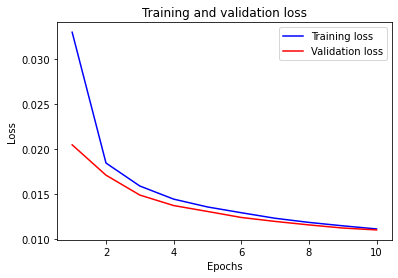

In [92]:
# Extract the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Question 10:** Show for an arbitrary image of the test set how the autoencoder works. In other words, plot an arbitrary original and  predicted image from the test set.

1/1 [==============================] - 0s 126ms/step


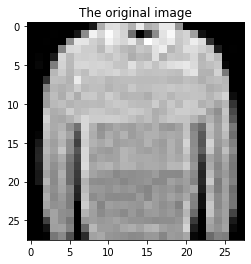

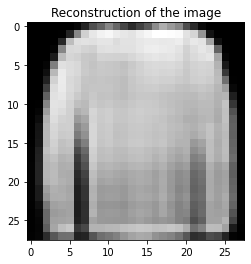

In [93]:
image = x_test[20]

# now we try to reconstruct the image
reconstructed_image = autoencoder.predict(image.reshape(1, 28, 28, 1))

# show original and predicted image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('The original image')
plt.show()
plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
plt.title('Reconstruction of the image')
plt.show()

**Question 11:** Calculate the loss for the autoencoder on the test set.

In [95]:
# Evaluate the model on the test set
loss = autoencoder.evaluate(x_test, x_test)

print('Loss on the test set is: {loss}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0111
Loss on the test set is: {loss}


Now, we will use the learned autoencoder for **similar image retrieval** task. More precisely, we can compute the distance between the latent-space vectors to look for similar images. Naturally, the smaller the distance, the more visually similar two images are. 

Your goal is to create a very simple image retrieval system by using the trained autoencoder and the [nearest-neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) algorithm.

**Question 12:** 
    
- Extract the encoder part of your autoencoder model and save it in the folder as `encoder.h5`.
- Fit the encoder part on your test set and reshape the output in order to obtain the latent space vectors.
- Choose an arbitrary query image from the test set.

In [97]:
# Extraction of the encoder
encoder = autoencoder.layers[0]

# Save the encoder modelin the folder as encoder.h5
autoencoder.save('models/autoencoder.h5')

In [141]:
encoder = keras.models.load_model('models/autoencoder.h5')

latent_vectors = encoder.predict(x_test)
#reshape
latent_vectors = np.reshape(latent_vectors,(10000,256))

313/313 [==============================] - 4s 12ms/step


ValueError: cannot reshape array of size 7840000 into shape (10000,256,1,1)

In [ ]:
# Choose an arbitrary query image from the test set
index = 10
query_image = x_test[index]

**Question 13:** 
- Fit the NN algorithm to the encoded test set in order to obtain distances and indices of the data.
- Find the $10$ closest images to the encoded query image.
- Plot the obtained $10$ closest images.

In [121]:
from sklearn.neighbors import NearestNeighbors

In [122]:
nn = NearestNeighbors(n_neighbors=10)

nn.fit(latent_vectors)

distances, indices = nn.kneighbors(query_image)

similar_images = x_test[indices]

plt.imshow(query_image.reshape(28, 28), cmap='gray')
plt.title('Query image')
plt.show()

# Display the 10 similar images
for i, image in enumerate(similar_images[0]):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title('Similar image {i+1}')
    plt.show()

ValueError: Found array with dim 4. NearestNeighbors expected <= 2.